### Import Pandas and Numpy

In [ ]:
import pandas as pd
import numpy as np

### Generate dataframe for orders, orderlines and Products and create copy dfs for data manipulation

In [ ]:
# orders.csv
url = "https://drive.google.com/file/d/1Vu0q91qZw6lqhIqbjoXYvYAQTmVHh6uZ/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
orders = pd.read_csv(path)
orders_df = orders.copy()

# orderlines.csv
url = "https://drive.google.com/file/d/1FYhN_2AzTBFuWcfHaRuKcuCE6CWXsWtG/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
orderlines = pd.read_csv(path)
orderlines_df = orderlines.copy()

# products.csv
url = 'https://drive.google.com/file/d/1afxwDXfl-7cQ_qLwyDitfcCx3u7WMvkU/view?usp=drive_link'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
products = pd.read_csv(path)
products_df = products.copy()

### Duplicates check and treatment

In [ ]:
# Count Dupes for each df
x = orders_df.duplicated().sum()
y = orderlines_df.duplicated().sum()
z = products_df.duplicated().sum()

print(x,y,z)

0 0 8746


In [ ]:
# Drop dupes from prodcut table
products_df = products_df.drop_duplicates()
z2 = products_df.duplicated().sum()
print(z2)

0


In [ ]:
# Count Dupes for each df again
x = orders_df.duplicated().sum()
y = orderlines_df.duplicated().sum()
z = products_df.duplicated().sum()

print(x,y,z)

0 0 0


### orders_df.info()

In [ ]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226909 entries, 0 to 226908
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   order_id      226909 non-null  int64  
 1   created_date  226909 non-null  object 
 2   total_paid    226904 non-null  float64
 3   state         226909 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 6.9+ MB


In [ ]:
#Re: Missing Values in total_paid
orders_df.total_paid.isna().value_counts(normalize=True)

False    0.999978
True     0.000022
Name: total_paid, dtype: float64

In [ ]:
# as the number of missing prices is very small, we will just delete those
orders_df = orders_df.loc[~orders.total_paid.isna(), :] # this will remove the missing price rows and assign the new df back to orders_df

In [ ]:
# rerun this command again to check if all missing price rows have been removed or not
orders_df.total_paid.isna().value_counts(normalize=True)

False    1.0
Name: total_paid, dtype: float64

In [ ]:
#Re: date format
# Assign datetime format
orders_df["created_date"] = pd.to_datetime(orders_df["created_date"])

In [ ]:
# Check if datetime has been assigned
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 226904 entries, 0 to 226908
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   order_id      226904 non-null  int64         
 1   created_date  226904 non-null  datetime64[ns]
 2   total_paid    226904 non-null  float64       
 3   state         226904 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 8.7+ MB


### orderlines_df.info()

In [ ]:
orderlines_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293983 entries, 0 to 293982
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                293983 non-null  int64 
 1   id_order          293983 non-null  int64 
 2   product_id        293983 non-null  int64 
 3   product_quantity  293983 non-null  int64 
 4   sku               293983 non-null  object
 5   unit_price        293983 non-null  object
 6   date              293983 non-null  object
dtypes: int64(4), object(3)
memory usage: 15.7+ MB


In [ ]:
#Regarding date format
# this will assign datetime format
orderlines_df['date'] = pd.to_datetime(orderlines_df['date'])

In [ ]:
# Check if datetime has been assigned
orderlines_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293983 entries, 0 to 293982
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id                293983 non-null  int64         
 1   id_order          293983 non-null  int64         
 2   product_id        293983 non-null  int64         
 3   product_quantity  293983 non-null  int64         
 4   sku               293983 non-null  object        
 5   unit_price        293983 non-null  object        
 6   date              293983 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 15.7+ MB


In [ ]:
#Regarding price format
# if we try to convert unit_price to numeric, it will not work as there are some strings (cells with double decimals in them)
#orderlines_df["unit_price"] =pd.to_numeric(orderlines_df["unit_price"])


In [ ]:
#therefore, we create a new column called unit_price 2 where we coerce the change, the string cells will be converted to NaNs, we will use this colun to filter for problematic values if needed
orderlines_df["unit_price2"] =pd.to_numeric(orderlines_df["unit_price"], errors='coerce')

In [ ]:
# count number of nas in unit_price2, proxy to count %age rows affected with double decimals
len(orderlines_df.loc[orderlines_df["unit_price2"].isna()])/len(orderlines_df)

# 36k or12% rows with unit_price2

0.12303092355680431

In [ ]:
#If unit_price2 is na then we want unit_price3 = orderlines_df['unit_price'].str.replace('.', '', 1) i.e. remove first decimal
# Else we want unit_price2 =  orderlines_df['unit_price']

# Create the 'unit_price3' column based on  conditions above and convert it to numeric
orderlines_df['unit_price3'] = np.where(orderlines_df['unit_price2'].isna(), orderlines_df['unit_price'].str.replace('.', '', 1), orderlines_df['unit_price'])


<ipython-input-18-dcb90725ee68>:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  orderlines_df['unit_price3'] = np.where(orderlines_df['unit_price2'].isna(), orderlines_df['unit_price'].str.replace('.', '', 1), orderlines_df['unit_price'])


In [ ]:
#convert unit_price 3 to numeric
orderlines_df['unit_price3'] = pd.to_numeric(orderlines_df["unit_price3"])

In [ ]:
orderlines_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293983 entries, 0 to 293982
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id                293983 non-null  int64         
 1   id_order          293983 non-null  int64         
 2   product_id        293983 non-null  int64         
 3   product_quantity  293983 non-null  int64         
 4   sku               293983 non-null  object        
 5   unit_price        293983 non-null  object        
 6   date              293983 non-null  datetime64[ns]
 7   unit_price2       257814 non-null  float64       
 8   unit_price3       293983 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(4), object(2)
memory usage: 20.2+ MB


### Break orderlines_df into two sections (with and without unit price issues)

In [ ]:
#orderlines_df_issue =
orderlines_df_issue = orderlines_df.loc[orderlines_df['unit_price2'].isna()]

In [ ]:
#orderlines_df_no_issue =
orderlines_df_no_issue = orderlines_df.loc[~(orderlines_df['unit_price2'].isna())]

### products_df.info()

In [ ]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10580 entries, 0 to 19325
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   sku          10580 non-null  object
 1   name         10580 non-null  object
 2   desc         10573 non-null  object
 3   price        10534 non-null  object
 4   promo_price  10580 non-null  object
 5   in_stock     10580 non-null  int64 
 6   type         10530 non-null  object
dtypes: int64(1), object(6)
memory usage: 661.2+ KB


In [ ]:
#Re: Missing Prices
products_df.price.isna().value_counts(normalize=True)


False    0.995652
True     0.004348
Name: price, dtype: float64

In [ ]:
# as the number of missing prices is very small, we will just delete those
# this will remove the missing price rows and assign the new df back to orders_df
products_df = products_df.loc[~products_df.price.isna(), :]


In [ ]:
# rerun this command again to check if all missing price rows have been removed or not
products_df.price.isna().value_counts(normalize=True)


False    1.0
Name: price, dtype: float64

In [ ]:
#Regarding price format
# if we try to convert price to numeric, it will not work as there are some strings (cells with double decimals in them)
#products_df["price"] =pd.to_numeric(products_df["price"])


In [ ]:
#therefore, we create a new column called price 2 where we coerce the change, the string cells will be converted to NaNs, , we will use this colun to filter for problematic values if needed
products_df["price2"] =pd.to_numeric(products_df["price"], errors='coerce')


<ipython-input-28-d31a1ef2166a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  products_df["price2"] =pd.to_numeric(products_df["price"], errors='coerce')


In [ ]:
# count number of nas in price2, proxy to count %age rows affected with double decimals
len(products_df.loc[products_df["price2"].isna()])/len(products_df)

# 377 or3.5% rows affected

0.035788874121891016

In [ ]:
# If price2 is na then we want price3 = products_df['price'].str.replace('.', '', 1)
# Else we want price2 =  products_df['price']

# Create the 'price3' column based on  conditions above and convert it to numeric
products_df['price3'] = np.where(products_df['price2'].isna(), products_df['price'].str.replace('.', '', 1), products_df['price'])

<ipython-input-30-2ceba126e599>:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  products_df['price3'] = np.where(products_df['price2'].isna(), products_df['price'].str.replace('.', '', 1), products_df['price'])
<ipython-input-30-2ceba126e599>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  products_df['price3'] = np.where(products_df['price2'].isna(), products_df['price'].str.replace('.', '', 1), products_df['price'])


In [ ]:
#convert unit_price 3 to numeric
products_df['price3'] = pd.to_numeric(products_df['price3'])

<ipython-input-31-286c262ef63b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  products_df['price3'] = pd.to_numeric(products_df['price3'])


In [ ]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10534 entries, 0 to 19325
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sku          10534 non-null  object 
 1   name         10534 non-null  object 
 2   desc         10527 non-null  object 
 3   price        10534 non-null  object 
 4   promo_price  10534 non-null  object 
 5   in_stock     10534 non-null  int64  
 6   type         10484 non-null  object 
 7   price2       10157 non-null  float64
 8   price3       10534 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 823.0+ KB


### Create a subset of product column with only prices and skus

In [ ]:
# products_sku_price_masterlist =
products_sku_price_masterlist = products_df.loc[: , ['sku', 'price3']]

In [ ]:
products_sku_price_masterlist.info()
#note price is still not numeric at this point as this also has double decimal issue

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10534 entries, 0 to 19325
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sku     10534 non-null  object 
 1   price3  10534 non-null  float64
dtypes: float64(1), object(1)
memory usage: 246.9+ KB


### Merge prices from products with the two subsets of orderlines table

In [ ]:
#with Issues
orderlines_df_issue = orderlines_df_issue.merge(products_sku_price_masterlist)

In [ ]:
orderlines_df_issue.head()

,id,id_order,product_id,product_quantity,sku,unit_price,date,unit_price2,unit_price3,price3
0,1119115,299544,0,1,APP1582,1.137.99,2017-01-01 01:17:21,NaN,1137.99,1219.0
1,1125963,302038,0,1,APP1582,1.184.99,2017-01-03 21:27:10,NaN,1184.99,1219.0
2,1126354,302050,0,1,APP1582,1.137.99,2017-01-03 21:43:12,NaN,1137.99,1219.0
3,1130117,302584,0,1,APP1582,1.137.99,2017-01-04 16:44:55,NaN,1137.99,1219.0
4,1130359,302718,0,1,APP1582,1.137.99,2017-01-04 19:59:34,NaN,1137.99,1219.0


In [ ]:
#without issues
orderlines_df_no_issue = orderlines_df_no_issue.merge(products_sku_price_masterlist)

In [ ]:
orderlines_df_no_issue.head()

,id,id_order,product_id,product_quantity,sku,unit_price,date,unit_price2,unit_price3,price3
0,1119109,299539,0,1,OTT0133,18.99,2017-01-01 00:07:19,18.99,18.99,34.99
1,1119236,299603,0,1,OTT0133,18.99,2017-01-01 10:18:53,18.99,18.99,34.99
2,1121709,300713,0,1,OTT0133,19.99,2017-01-02 16:51:26,19.99,19.99,34.99
3,1123230,301432,0,1,OTT0133,19.99,2017-01-03 11:21:52,19.99,19.99,34.99
4,1129502,302307,0,1,OTT0133,19.99,2017-01-04 10:11:45,19.99,19.99,34.99


### Compare unit price3 and price3 and evaluate the discount spread for both versions of orderlines

1.   List item
2.   List item



In [ ]:
#with Issues
orderlines_df_issue['delta_check']= (orderlines_df_issue['price3']/orderlines_df_issue['unit_price3']-1)*100


In [ ]:
orderlines_df_issue

,id,id_order,product_id,product_quantity,sku,unit_price,date,unit_price2,unit_price3,price3,delta_check
0,1119115,299544,0,1,APP1582,1.137.99,2017-01-01 01:17:21,NaN,1137.99,1219.00,7.118692
1,1125963,302038,0,1,APP1582,1.184.99,2017-01-03 21:27:10,NaN,1184.99,1219.00,2.870066
2,1126354,302050,0,1,APP1582,1.137.99,2017-01-03 21:43:12,NaN,1137.99,1219.00,7.118692
3,1130117,302584,0,1,APP1582,1.137.99,2017-01-04 16:44:55,NaN,1137.99,1219.00,7.118692
4,1130359,302718,0,1,APP1582,1.137.99,2017-01-04 19:59:34,NaN,1137.99,1219.00,7.118692
...,...,...,...,...,...,...,...,...,...,...,...
36133,1632317,519798,0,1,LAC0154-A,1.215.26,2018-03-02 08:57:34,NaN,1215.26,1399.00,15.119398
36134,1632323,519801,0,1,LAC0154-A,1.215.26,2018-03-02 08:59:34,NaN,1215.26,1399.00,15.119398
36135,1633989,520096,0,1,DLL0053,1.569.99,2018-03-03 14:17:50,NaN,1569.99,1869.99,19.108402
36136,1646553,525260,0,1,APP2689,6.071.00,2018-03-11 22:50:41,NaN,6071.00,6459.00,6.391039


In [ ]:
#without Issues
orderlines_df_no_issue['delta_check']= (orderlines_df_no_issue['price3']/orderlines_df_no_issue['unit_price3']-1)*100

In [ ]:
orderlines_df_no_issue

,id,id_order,product_id,product_quantity,sku,unit_price,date,unit_price2,unit_price3,price3,delta_check
0,1119109,299539,0,1,OTT0133,18.99,2017-01-01 00:07:19,18.99,18.99,34.990,84.254871
1,1119236,299603,0,1,OTT0133,18.99,2017-01-01 10:18:53,18.99,18.99,34.990,84.254871
2,1121709,300713,0,1,OTT0133,19.99,2017-01-02 16:51:26,19.99,19.99,34.990,75.037519
3,1123230,301432,0,1,OTT0133,19.99,2017-01-03 11:21:52,19.99,19.99,34.990,75.037519
4,1129502,302307,0,1,OTT0133,19.99,2017-01-04 10:11:45,19.99,19.99,34.990,75.037519
...,...,...,...,...,...,...,...,...,...,...,...
256298,1649391,527021,0,1,WAC0255,186.99,2018-03-14 11:36:03,186.99,186.99,199.000,6.422803
256299,1649865,527043,0,1,WAC0257,186.99,2018-03-14 12:38:59,186.99,186.99,199.000,6.422803
256300,1649971,526998,0,1,HTE0013-A,48.68,2018-03-14 12:57:52,48.68,48.68,79.950,64.235826
256301,1649972,527278,0,1,ADN0061,80.99,2018-03-14 12:57:54,80.99,80.99,84.990,4.938881


<Axes: >

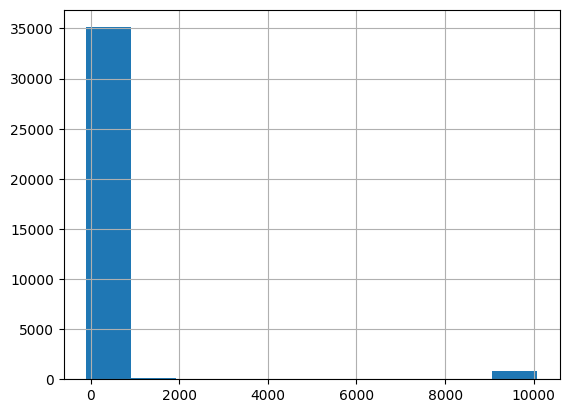

In [ ]:
#hist with issues
orderlines_df_issue.delta_check.hist()

In [ ]:
orderlines_df_issue.loc[orderlines_df_issue['delta_check']>2000].sort_values(by = "delta_check", ascending = False)

,id,id_order,product_id,product_quantity,sku,unit_price,date,unit_price2,unit_price3,price3,delta_check
31788,1589159,501719,0,1,APP2490,1.139.00,2018-01-30 07:55:03,NaN,1139.0,115900.092,10075.600702
31737,1570641,494643,0,1,APP2490,1.139.00,2018-01-19 16:19:56,NaN,1139.0,115900.092,10075.600702
31727,1567527,493531,0,1,APP2490,1.139.00,2018-01-18 12:42:40,NaN,1139.0,115900.092,10075.600702
31728,1569294,494040,0,1,APP2490,1.139.00,2018-01-18 17:09:20,NaN,1139.0,115900.092,10075.600702
31729,1569419,494096,0,1,APP2490,1.139.00,2018-01-18 18:47:55,NaN,1139.0,115900.092,10075.600702
...,...,...,...,...,...,...,...,...,...,...,...
31434,1518978,473391,0,1,APP2490,1.159.00,2017-12-27 13:46:32,NaN,1159.0,115900.092,9900.007938
31435,1519025,473416,0,1,APP2490,1.159.00,2017-12-27 14:09:28,NaN,1159.0,115900.092,9900.007938
31436,1519061,473433,0,1,APP2490,1.159.00,2017-12-27 14:26:40,NaN,1159.0,115900.092,9900.007938
31437,1519092,473450,0,1,APP2490,1.159.00,2017-12-27 14:45:16,NaN,1159.0,115900.092,9900.007938


In [ ]:
orderlines_df_issue.loc[orderlines_df_issue['delta_check']>200].sort_values(by = "delta_check", ascending = False)

,id,id_order,product_id,product_quantity,sku,unit_price,date,unit_price2,unit_price3,price3,delta_check
31751,1574957,494747,0,1,APP2490,1.139.00,2018-01-23 00:31:18,NaN,1139.00,115900.092,10075.600702
31797,1593769,503384,0,1,APP2490,1.139.00,2018-01-31 23:00:49,NaN,1139.00,115900.092,10075.600702
31791,1589727,501917,0,1,APP2490,1.139.00,2018-01-30 12:22:24,NaN,1139.00,115900.092,10075.600702
31792,1589836,501967,0,1,APP2490,1.139.00,2018-01-30 13:29:28,NaN,1139.00,115900.092,10075.600702
31793,1590406,502173,0,1,APP2490,1.139.00,2018-01-30 19:29:23,NaN,1139.00,115900.092,10075.600702
...,...,...,...,...,...,...,...,...,...,...,...
23387,1270657,366946,0,1,QNA0185,3.627.99,2017-06-19 02:09:08,NaN,3627.99,36279.902,900.000055
23388,1283316,373088,0,1,QNA0185,3.627.99,2017-07-05 14:43:01,NaN,3627.99,36279.902,900.000055
5232,1400786,423535,0,1,QNA0184,5.079.99,2017-11-08 18:01:11,NaN,5079.99,50799.902,900.000039
33226,1408263,427134,0,1,PAC2014,1.632.75,2017-11-15 13:18:39,NaN,1632.75,15347.892,840.002572


In [ ]:
#from the picture above it seems, if we divide price3 by 10 wherever delta > 200, we should be closer to the corret value
orderlines_df_issue['price3'] = np.where(orderlines_df_issue['delta_check']>200, orderlines_df_issue['price3']/10, orderlines_df_issue['price3'])

In [ ]:
#update delta column again
orderlines_df_issue['delta_check']= (orderlines_df_issue['price3']/orderlines_df_issue['unit_price3']-1)*100

<Axes: >

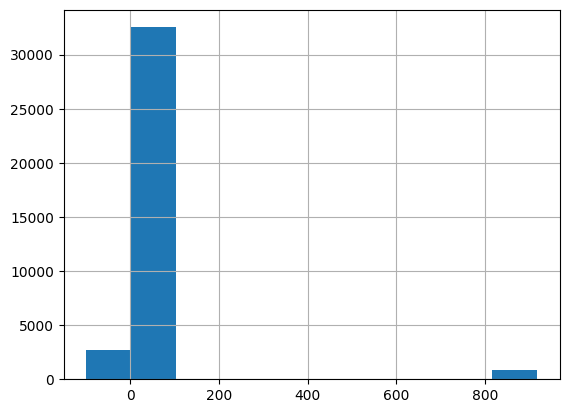

In [ ]:
orderlines_df_issue.delta_check.hist()

In [ ]:
orderlines_df_issue.loc[orderlines_df_issue['delta_check']>800].sort_values(by = "delta_check", ascending = False)

,id,id_order,product_id,product_quantity,sku,unit_price,date,unit_price2,unit_price3,price3,delta_check
31788,1589159,501719,0,1,APP2490,1.139.00,2018-01-30 07:55:03,NaN,1139.0,11590.0092,917.560070
31737,1570641,494643,0,1,APP2490,1.139.00,2018-01-19 16:19:56,NaN,1139.0,11590.0092,917.560070
31727,1567527,493531,0,1,APP2490,1.139.00,2018-01-18 12:42:40,NaN,1139.0,11590.0092,917.560070
31728,1569294,494040,0,1,APP2490,1.139.00,2018-01-18 17:09:20,NaN,1139.0,11590.0092,917.560070
31729,1569419,494096,0,1,APP2490,1.139.00,2018-01-18 18:47:55,NaN,1139.0,11590.0092,917.560070
...,...,...,...,...,...,...,...,...,...,...,...
31434,1518978,473391,0,1,APP2490,1.159.00,2017-12-27 13:46:32,NaN,1159.0,11590.0092,900.000794
31435,1519025,473416,0,1,APP2490,1.159.00,2017-12-27 14:09:28,NaN,1159.0,11590.0092,900.000794
31436,1519061,473433,0,1,APP2490,1.159.00,2017-12-27 14:26:40,NaN,1159.0,11590.0092,900.000794
31437,1519092,473450,0,1,APP2490,1.159.00,2017-12-27 14:45:16,NaN,1159.0,11590.0092,900.000794


In [ ]:
#from the picture above it seems, if we divide price3 by 10 wherever delta > 800, we should be closer to the corret value
orderlines_df_issue['price3'] = np.where(orderlines_df_issue['delta_check']>800, orderlines_df_issue['price3']/10, orderlines_df_issue['price3'])

In [ ]:
#update delta column again
orderlines_df_issue['delta_check']= (orderlines_df_issue['price3']/orderlines_df_issue['unit_price3']-1)*100

<Axes: >

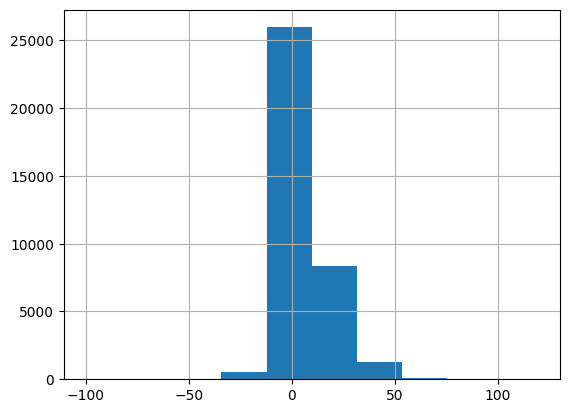

In [ ]:
orderlines_df_issue.delta_check.hist()

In [ ]:
#hist without issues
#orderlines_df_no_issue.delta_check.hist()

#since we can't generate hist, we will see what is wrong with the inf values

In [ ]:
#issue driven by low prices
orderlines_df_no_issue.loc[orderlines_df_no_issue['unit_price3']<1].sort_values(by = "unit_price3")

,id,id_order,product_id,product_quantity,sku,unit_price,date,unit_price2,unit_price3,price3,delta_check
25303,1268645,365886,0,1,APP1465,-119.00,2017-06-15 12:48:54,-119.00,-119.00,119.00,-2.000000e+02
1068,1515425,471685,0,1,OWC0100,0.00,2017-12-26 00:46:05,0.00,0.00,60.99,inf
204681,1530016,478527,0,1,ALL0008,0.00,2018-01-01 14:46:07,0.00,0.00,12.95,inf
204705,1575058,496507,0,1,ALL0008,0.00,2018-01-23 03:40:39,0.00,0.00,12.95,inf
204706,1575062,496508,0,1,ALL0008,0.00,2018-01-23 03:40:42,0.00,0.00,12.95,inf
...,...,...,...,...,...,...,...,...,...,...,...
170371,1253375,358440,0,1,SEV0018,0.01,2017-05-23 16:21:58,0.01,0.01,19.99,1.998000e+05
144027,1476822,455322,0,1,SAN0148,0.29,2017-12-04 23:04:21,0.29,0.29,30.99,1.058621e+04
144035,1498481,463807,0,1,SAN0148,0.29,2017-12-15 14:46:14,0.29,0.29,30.99,1.058621e+04
144036,1498492,463808,0,1,SAN0148,0.29,2017-12-15 14:46:19,0.29,0.29,30.99,1.058621e+04


In [ ]:
#Remove low prices from the set
orderlines_df_no_issue = orderlines_df_no_issue.loc[~(orderlines_df_no_issue['unit_price3']<1)]

<Axes: >

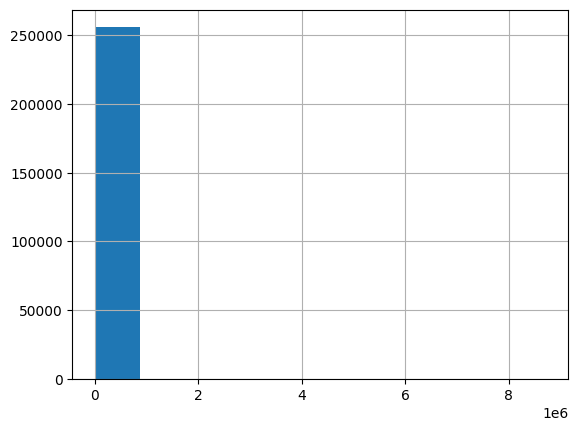

In [ ]:
orderlines_df_no_issue.delta_check.hist()


In [ ]:
orderlines_df_no_issue.loc[orderlines_df_no_issue['delta_check']>1000].sort_values(by = "delta_check", ascending = True)

,id,id_order,product_id,product_quantity,sku,unit_price,date,unit_price2,unit_price3,price3,delta_check
112999,1344981,396445,0,1,CRU0015-2,148.99,2017-09-04 17:29:32,148.99,148.99,1639.792,1.000605e+03
113051,1387727,417275,0,1,CRU0015-2,148.99,2017-10-25 09:05:24,148.99,148.99,1639.792,1.000605e+03
113006,1350460,399055,0,1,CRU0015-2,148.99,2017-09-12 08:48:53,148.99,148.99,1639.792,1.000605e+03
112951,1286175,374393,0,1,CRU0015-2,148.99,2017-07-07 23:09:42,148.99,148.99,1639.792,1.000605e+03
113052,1389100,417932,0,1,CRU0015-2,148.99,2017-10-26 09:07:47,148.99,148.99,1639.792,1.000605e+03
...,...,...,...,...,...,...,...,...,...,...,...
254141,1574478,496269,0,1,APP2674,6.59,2018-01-22 18:07:59,6.59,6.59,7179.000,1.088378e+05
219030,1590237,502115,0,1,REP0185,59.00,2018-01-30 17:53:23,59.00,59.00,69989.909,1.185270e+05
219029,1550355,486883,0,1,REP0185,59.00,2018-01-09 18:19:34,59.00,59.00,69989.909,1.185270e+05
249473,1535948,481236,0,1,APP2490,1.33,2018-01-03 19:05:36,1.33,1.33,115900.092,8.714193e+06


In [ ]:
#from the picture above it seems, if we divide price3 by 10 wherever delta > 1000, we should be closer to the corret value
orderlines_df_no_issue['price3'] = np.where(orderlines_df_no_issue['delta_check']>1000, orderlines_df_no_issue['price3']/10, orderlines_df_no_issue['price3'])

<ipython-input-58-8e9bd0ea66ac>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orderlines_df_no_issue['price3'] = np.where(orderlines_df_no_issue['delta_check']>1000, orderlines_df_no_issue['price3']/10, orderlines_df_no_issue['price3'])


In [ ]:
#update delta column again
orderlines_df_no_issue['delta_check']= (orderlines_df_no_issue['price3']/orderlines_df_no_issue['unit_price3']-1)*100

<ipython-input-59-a2e756edb7be>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orderlines_df_no_issue['delta_check']= (orderlines_df_no_issue['price3']/orderlines_df_no_issue['unit_price3']-1)*100


<Axes: >

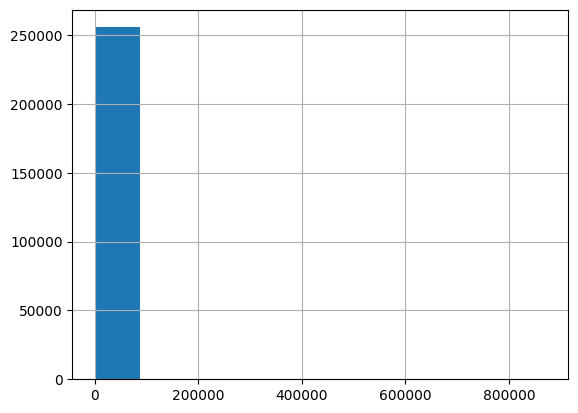

In [ ]:
orderlines_df_no_issue.delta_check.hist()


In [ ]:
orderlines_df_no_issue.loc[orderlines_df_no_issue['delta_check']>1000].sort_values(by = "delta_check", ascending = True)

,id,id_order,product_id,product_quantity,sku,unit_price,date,unit_price2,unit_price3,price3,delta_check
246914,1426567,434054,0,1,REP0362,62.99,2017-11-23 10:54:25,62.99,62.99,699.9003,1011.129227
218308,1453642,446237,0,1,REP0365,62.99,2017-11-26 21:23:18,62.99,62.99,699.9003,1011.129227
218307,1450224,444761,0,1,REP0365,62.99,2017-11-26 09:20:18,62.99,62.99,699.9003,1011.129227
218306,1449361,444449,0,1,REP0365,62.99,2017-11-26 00:56:31,62.99,62.99,699.9003,1011.129227
44284,1206536,335920,0,1,IOT0018,22.49,2017-03-16 19:08:34,22.49,22.49,249.9013,1011.166296
...,...,...,...,...,...,...,...,...,...,...,...
254141,1574478,496269,0,1,APP2674,6.59,2018-01-22 18:07:59,6.59,6.59,717.9000,10793.778452
219030,1590237,502115,0,1,REP0185,59.00,2018-01-30 17:53:23,59.00,59.00,6998.9909,11762.696441
219029,1550355,486883,0,1,REP0185,59.00,2018-01-09 18:19:34,59.00,59.00,6998.9909,11762.696441
249473,1535948,481236,0,1,APP2490,1.33,2018-01-03 19:05:36,1.33,1.33,11590.0092,871329.263158


In [ ]:
#from the picture above it seems, if we divide price3 by 10 wherever delta > 1000, we should be closer to the corret value
orderlines_df_no_issue['price3'] = np.where(orderlines_df_no_issue['delta_check']>1000, orderlines_df_no_issue['price3']/10, orderlines_df_no_issue['price3'])

<ipython-input-62-8e9bd0ea66ac>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orderlines_df_no_issue['price3'] = np.where(orderlines_df_no_issue['delta_check']>1000, orderlines_df_no_issue['price3']/10, orderlines_df_no_issue['price3'])


In [ ]:
#update delta column again
orderlines_df_no_issue['delta_check']= (orderlines_df_no_issue['price3']/orderlines_df_no_issue['unit_price3']-1)*100

<ipython-input-63-a2e756edb7be>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orderlines_df_no_issue['delta_check']= (orderlines_df_no_issue['price3']/orderlines_df_no_issue['unit_price3']-1)*100


<Axes: >

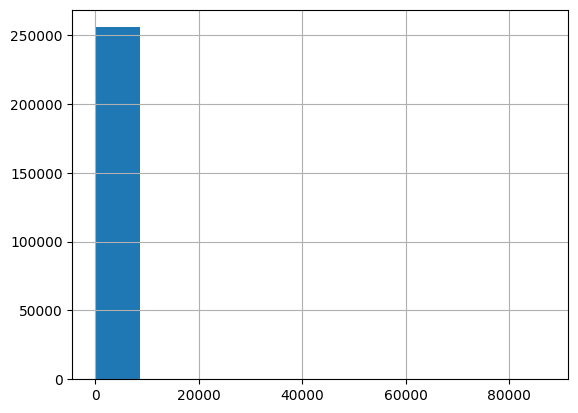

In [ ]:
orderlines_df_no_issue.delta_check.hist()


In [ ]:
orderlines_df_no_issue.loc[orderlines_df_no_issue['delta_check']>1000].sort_values(by = "delta_check", ascending = True)

,id,id_order,product_id,product_quantity,sku,unit_price,date,unit_price2,unit_price3,price3,delta_check
219029,1550355,486883,0,1,REP0185,59.00,2018-01-09 18:19:34,59.00,59.00,699.89909,1086.269644
219030,1590237,502115,0,1,REP0185,59.00,2018-01-30 17:53:23,59.00,59.00,699.89909,1086.269644
249473,1535948,481236,0,1,APP2490,1.33,2018-01-03 19:05:36,1.33,1.33,1159.00092,87042.926316
249474,1535952,481237,0,1,APP2490,1.33,2018-01-03 19:05:46,1.33,1.33,1159.00092,87042.926316


In [ ]:
#from the picture above it seems, if we divide price3 by 10 wherever delta > 1000, we should be closer to the corret value
orderlines_df_no_issue['price3'] = np.where(orderlines_df_no_issue['delta_check']>1000, orderlines_df_no_issue['price3']/10, orderlines_df_no_issue['price3'])

<ipython-input-66-8e9bd0ea66ac>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orderlines_df_no_issue['price3'] = np.where(orderlines_df_no_issue['delta_check']>1000, orderlines_df_no_issue['price3']/10, orderlines_df_no_issue['price3'])


In [ ]:
#update delta column again
orderlines_df_no_issue['delta_check']= (orderlines_df_no_issue['price3']/orderlines_df_no_issue['unit_price3']-1)*100

<ipython-input-67-a2e756edb7be>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orderlines_df_no_issue['delta_check']= (orderlines_df_no_issue['price3']/orderlines_df_no_issue['unit_price3']-1)*100


<Axes: >

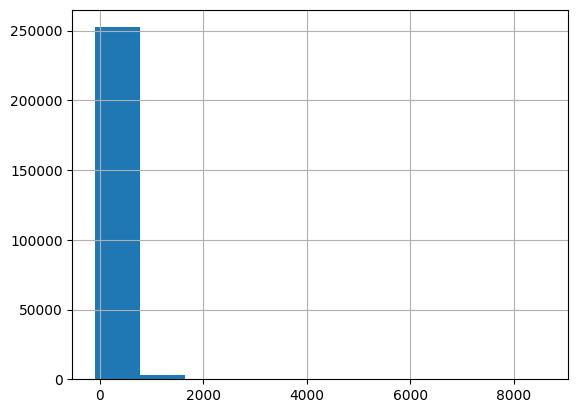

In [ ]:
orderlines_df_no_issue.delta_check.hist()


In [ ]:
orderlines_df_no_issue.loc[orderlines_df_no_issue['delta_check']>1000].sort_values(by = "delta_check", ascending = True)

,id,id_order,product_id,product_quantity,sku,unit_price,date,unit_price2,unit_price3,price3,delta_check
249473,1535948,481236,0,1,APP2490,1.33,2018-01-03 19:05:36,1.33,1.33,115.900092,8614.292632
249474,1535952,481237,0,1,APP2490,1.33,2018-01-03 19:05:46,1.33,1.33,115.900092,8614.292632


In [ ]:
#drop above
orderlines_df_no_issue = orderlines_df_no_issue.loc[~(orderlines_df_no_issue['delta_check']>1000)]

<Axes: >

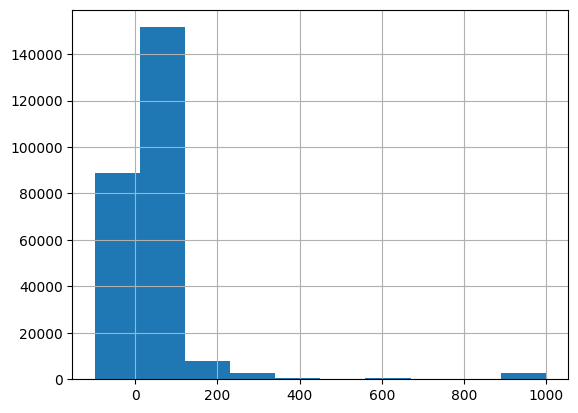

In [ ]:
orderlines_df_no_issue.delta_check.hist()


In [ ]:
orderlines_df_no_issue.loc[orderlines_df_no_issue['delta_check']>800].sort_values(by = "delta_check", ascending = True)

,id,id_order,product_id,product_quantity,sku,unit_price,date,unit_price2,unit_price3,price3,delta_check
255511,1616263,512651,0,1,MOP0105,9.99,2018-02-16 09:54:28,9.99,9.99,89.950,800.400400
255450,1615897,512486,0,1,MOP0106,9.99,2018-02-16 08:48:52,9.99,9.99,89.950,800.400400
255451,1615908,512493,0,1,MOP0106,9.99,2018-02-16 08:51:54,9.99,9.99,89.950,800.400400
255452,1615919,512497,0,1,MOP0106,9.99,2018-02-16 08:54:36,9.99,9.99,89.950,800.400400
255453,1615924,512500,0,1,MOP0106,9.99,2018-02-16 08:55:04,9.99,9.99,89.950,800.400400
...,...,...,...,...,...,...,...,...,...,...,...
29670,1159121,314784,0,1,PAC1400,90.99,2017-01-25 15:45:12,90.99,90.99,999.799,998.800967
29681,1161678,315917,0,1,PAC1400,90.99,2017-01-27 15:15:46,90.99,90.99,999.799,998.800967
29647,1119447,299695,0,1,PAC1400,90.99,2017-01-01 13:27:15,90.99,90.99,999.799,998.800967
177557,1466817,451435,0,1,PAC1905,343.58,2017-11-29 06:54:43,343.58,343.58,3776.292,999.101228


In [ ]:
#from the picture above it seems, if we divide price3 by 10 wherever delta > 800, we should be closer to the corret value
orderlines_df_no_issue['price3'] = np.where(orderlines_df_no_issue['delta_check']>800, orderlines_df_no_issue['price3']/10, orderlines_df_no_issue['price3'])

In [ ]:
#update delta column again
orderlines_df_no_issue['delta_check']= (orderlines_df_no_issue['price3']/orderlines_df_no_issue['unit_price3']-1)*100

<Axes: >

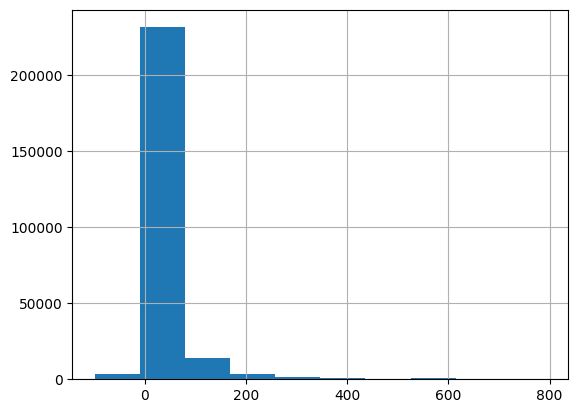

In [ ]:
orderlines_df_no_issue.delta_check.hist()


### Merge the two data frames and create a new column of discounts

In [ ]:
orderlines_df_no_issue


,id,id_order,product_id,product_quantity,sku,unit_price,date,unit_price2,unit_price3,price3,delta_check
0,1119109,299539,0,1,OTT0133,18.99,2017-01-01 00:07:19,18.99,18.99,34.9900,84.254871
1,1119236,299603,0,1,OTT0133,18.99,2017-01-01 10:18:53,18.99,18.99,34.9900,84.254871
2,1121709,300713,0,1,OTT0133,19.99,2017-01-02 16:51:26,19.99,19.99,34.9900,75.037519
3,1123230,301432,0,1,OTT0133,19.99,2017-01-03 11:21:52,19.99,19.99,34.9900,75.037519
4,1129502,302307,0,1,OTT0133,19.99,2017-01-04 10:11:45,19.99,19.99,34.9900,75.037519
...,...,...,...,...,...,...,...,...,...,...,...
256298,1649391,527021,0,1,WAC0255,186.99,2018-03-14 11:36:03,186.99,186.99,199.0000,6.422803
256299,1649865,527043,0,1,WAC0257,186.99,2018-03-14 12:38:59,186.99,186.99,199.0000,6.422803
256300,1649971,526998,0,1,HTE0013-A,48.68,2018-03-14 12:57:52,48.68,48.68,79.9500,64.235826
256301,1649972,527278,0,1,ADN0061,80.99,2018-03-14 12:57:54,80.99,80.99,84.9900,4.938881


In [ ]:
orderlines_df_issue

,id,id_order,product_id,product_quantity,sku,unit_price,date,unit_price2,unit_price3,price3,delta_check
0,1119115,299544,0,1,APP1582,1.137.99,2017-01-01 01:17:21,NaN,1137.99,1219.00,7.118692
1,1125963,302038,0,1,APP1582,1.184.99,2017-01-03 21:27:10,NaN,1184.99,1219.00,2.870066
2,1126354,302050,0,1,APP1582,1.137.99,2017-01-03 21:43:12,NaN,1137.99,1219.00,7.118692
3,1130117,302584,0,1,APP1582,1.137.99,2017-01-04 16:44:55,NaN,1137.99,1219.00,7.118692
4,1130359,302718,0,1,APP1582,1.137.99,2017-01-04 19:59:34,NaN,1137.99,1219.00,7.118692
...,...,...,...,...,...,...,...,...,...,...,...
36133,1632317,519798,0,1,LAC0154-A,1.215.26,2018-03-02 08:57:34,NaN,1215.26,1399.00,15.119398
36134,1632323,519801,0,1,LAC0154-A,1.215.26,2018-03-02 08:59:34,NaN,1215.26,1399.00,15.119398
36135,1633989,520096,0,1,DLL0053,1.569.99,2018-03-03 14:17:50,NaN,1569.99,1869.99,19.108402
36136,1646553,525260,0,1,APP2689,6.071.00,2018-03-11 22:50:41,NaN,6071.00,6459.00,6.391039


In [ ]:
combined_df = pd.concat([orderlines_df_no_issue, orderlines_df_issue], ignore_index=True)
combined_df

,id,id_order,product_id,product_quantity,sku,unit_price,date,unit_price2,unit_price3,price3,delta_check
0,1119109,299539,0,1,OTT0133,18.99,2017-01-01 00:07:19,18.99,18.99,34.99,84.254871
1,1119236,299603,0,1,OTT0133,18.99,2017-01-01 10:18:53,18.99,18.99,34.99,84.254871
2,1121709,300713,0,1,OTT0133,19.99,2017-01-02 16:51:26,19.99,19.99,34.99,75.037519
3,1123230,301432,0,1,OTT0133,19.99,2017-01-03 11:21:52,19.99,19.99,34.99,75.037519
4,1129502,302307,0,1,OTT0133,19.99,2017-01-04 10:11:45,19.99,19.99,34.99,75.037519
...,...,...,...,...,...,...,...,...,...,...,...
291858,1632317,519798,0,1,LAC0154-A,1.215.26,2018-03-02 08:57:34,NaN,1215.26,1399.00,15.119398
291859,1632323,519801,0,1,LAC0154-A,1.215.26,2018-03-02 08:59:34,NaN,1215.26,1399.00,15.119398
291860,1633989,520096,0,1,DLL0053,1.569.99,2018-03-03 14:17:50,NaN,1569.99,1869.99,19.108402
291861,1646553,525260,0,1,APP2689,6.071.00,2018-03-11 22:50:41,NaN,6071.00,6459.00,6.391039


<Axes: >

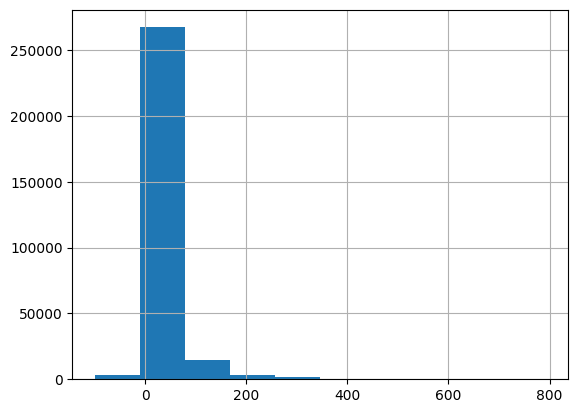

In [ ]:
combined_df.delta_check.hist()


In [ ]:
combined_df.loc[combined_df['delta_check']>100].sort_values(by = "delta_check", ascending = True)

,id,id_order,product_id,product_quantity,sku,unit_price,date,unit_price2,unit_price3,price3,delta_check
5054,1121574,300662,0,1,PEB0015,149.99,2017-01-02 15:47:19,149.99,149.99,299.99,100.006667
5052,1120837,300362,0,1,PEB0015,149.99,2017-01-02 11:07:08,149.99,149.99,299.99,100.006667
5055,1121758,298871,0,1,PEB0015,149.99,2017-01-02 17:04:44,149.99,149.99,299.99,100.006667
5056,1122164,300830,0,1,PEB0015,149.99,2017-01-02 19:43:13,149.99,149.99,299.99,100.006667
5057,1122173,300918,0,1,PEB0015,149.99,2017-01-02 19:47:20,149.99,149.99,299.99,100.006667
...,...,...,...,...,...,...,...,...,...,...,...
254793,1616497,512760,0,1,MOP0107,7.99,2018-02-16 11:03:48,7.99,7.99,69.95,775.469337
254794,1616510,512750,0,1,MOP0107,7.99,2018-02-16 11:07:41,7.99,7.99,69.95,775.469337
254789,1616251,512644,0,1,MOP0107,7.99,2018-02-16 09:52:16,7.99,7.99,69.95,775.469337
254370,1616836,512899,0,1,MOP0109,7.99,2018-02-16 13:27:39,7.99,7.99,69.95,775.469337


In [ ]:
len(orderlines) - len(combined_df)

2120